In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [37]:
Data=pd.read_csv("cars24.csv")
Data.head(2)

,Unnamed: 0,MODELS,VERSION,BRANDS,Fuel,MODEL_YEAR,RTO,Transmission,OWNER,KM_DRIVEN,Location,EMI,FINAL_PRICE,ACTUAL_PRICE
0,0,Dzire,VXI,Maruti,Petrol,2021,TS-15,Manual,1,"17,294","Kompally, Hyderabad","₹13,470","6,89,000","6,89,000"
1,1,Ertiga,ZXI,Maruti,Petrol,2015,TS-08,Manual,1,"96,184","Kompally, Hyderabad","₹12,629","6,46,000","6,74,000"


In [38]:
Data.shape

(833, 14)

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    833 non-null    int64 
 1   MODELS        833 non-null    object
 2   VERSION       833 non-null    object
 3   BRANDS        833 non-null    object
 4   Fuel          833 non-null    object
 5   MODEL_YEAR    833 non-null    int64 
 6   RTO           833 non-null    object
 7   Transmission  833 non-null    object
 8   OWNER         833 non-null    int64 
 9   KM_DRIVEN     833 non-null    object
 10  Location      833 non-null    object
 11  EMI           833 non-null    object
 12  FINAL_PRICE   833 non-null    object
 13  ACTUAL_PRICE  833 non-null    object
dtypes: int64(3), object(11)
memory usage: 91.2+ KB


In [40]:
Data.isnull().sum() ## shows how many null values are present in each column 

Unnamed: 0      0
MODELS          0
VERSION         0
BRANDS          0
Fuel            0
MODEL_YEAR      0
RTO             0
Transmission    0
OWNER           0
KM_DRIVEN       0
Location        0
EMI             0
FINAL_PRICE     0
ACTUAL_PRICE    0
dtype: int64

In [41]:
Data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [42]:
Data.drop([13,190,198,199,359,731,750,],axis=0, inplace=True)

In [43]:
Data.columns

Index(['MODELS', 'VERSION', 'BRANDS', 'Fuel', 'MODEL_YEAR', 'RTO',
       'Transmission', 'OWNER', 'KM_DRIVEN', 'Location', 'EMI', 'FINAL_PRICE',
       'ACTUAL_PRICE'],
      dtype='object')

In [44]:
Data.shape

(826, 13)

In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 832
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MODELS        826 non-null    object
 1   VERSION       826 non-null    object
 2   BRANDS        826 non-null    object
 3   Fuel          826 non-null    object
 4   MODEL_YEAR    826 non-null    int64 
 5   RTO           826 non-null    object
 6   Transmission  826 non-null    object
 7   OWNER         826 non-null    int64 
 8   KM_DRIVEN     826 non-null    object
 9   Location      826 non-null    object
 10  EMI           826 non-null    object
 11  FINAL_PRICE   826 non-null    object
 12  ACTUAL_PRICE  826 non-null    object
dtypes: int64(2), object(11)
memory usage: 90.3+ KB


## Observation:

##### Hear i observed how many are in `string` and `integer`, and which columns need to convert to `integer`
    
##### In the above info there are some columns like `EMI` , `FINAL_PRICE` , `ACTUAL_PRICE` , `KM_DRIVEN` are string by default because of comma's.
    
##### Rupee symbol has to remove from data to conver them into `integer`

In [46]:
Data["EMI"] = Data["EMI"].str.replace("₹", "").str.replace(",", "")
Data["FINAL_PRICE"] = Data["FINAL_PRICE"].str.replace(",", "")
Data["ACTUAL_PRICE"] = Data["ACTUAL_PRICE"].str.replace(",", "")
Data["KM_DRIVEN"] = Data["KM_DRIVEN"].str.replace(",", "")

## Observation:

##### In the above cell commas and symbols are removed from `EMI` , `FINAL_PRICE` , `ACTUAL_PRICE` , `KM_DRIVEN` 

In [47]:
Data["EMI"] = Data["EMI"].astype(int)
Data["FINAL_PRICE"] = Data["FINAL_PRICE"].astype(int)
Data["ACTUAL_PRICE"] = Data["ACTUAL_PRICE"].astype(int)
Data["KM_DRIVEN"] = Data["KM_DRIVEN"].astype(int)
Data["MODEL_YEAR"] = Data["MODEL_YEAR"].astype(int)

## Observation:

##### `EMI` , `FINAL_PRICE` , `ACTUAL_PRICE` , `KM_DRIVEN`  are converted from string to interger in the above cell

In [48]:
Data["Discount_Amount"]=Data["ACTUAL_PRICE"]-Data["FINAL_PRICE"]
Data['Percentage'] = (Data['ACTUAL_PRICE'] / Data['FINAL_PRICE'])*100/len(Data)

In [49]:
Data.drop(['Percentage'],axis=1, inplace=True)

## Observation:

##### in the above cell new column `Discount_Amount` is created  by subtracting `ACTUAL_PRICE` from `FINAL_PRICE`

In [50]:
Data["current_year"] = datetime.now().year
Data['CAR_AGE'] = Data["current_year"] - Data['MODEL_YEAR']


## Observation:

##### in the above cell new column `CAR_AGE` is created  by calucalating `current_year` from `MODEL_YEAR`

In [51]:
Data.drop(['current_year'],axis=1, inplace=True)

In [52]:
Data.head(2)

,MODELS,VERSION,BRANDS,Fuel,MODEL_YEAR,RTO,Transmission,OWNER,KM_DRIVEN,Location,EMI,FINAL_PRICE,ACTUAL_PRICE,Discount_Amount,CAR_AGE
0,Dzire,VXI,Maruti,Petrol,2021,TS-15,Manual,1,17294,"Kompally, Hyderabad",13470,689000,689000,0,2
1,Ertiga,ZXI,Maruti,Petrol,2015,TS-08,Manual,1,96184,"Kompally, Hyderabad",12629,646000,674000,28000,8


## Observation:

##### Above cell is used to check the statistical numerical data from table data

In [112]:
Data['Location']=Data['Location'].replace("Benga...","Bengaluru")
Data['Location']=Data['Location'].replace("Benga","Bengaluru")
Data['Location']=Data['Location'].replace("Hyderabad.","Hyderabad")
Data['Location']=Data['Location'].replace("Sonnappanahalli","Bengaluru")
Data['Location']=Data['Location'].replace("Navalur","Chennai")
Data['Location']=Data['Location'].replace("Mori","Indore")

Data['Location'].value_counts()

Chennai      190
Bengaluru    189
Hyderabad    183
Ahmedabad    164
Indore       100
Name: Location, dtype: int64

## Observation:

##### in the above cell from location column incorrected spelings with corret one's

In [113]:
Data['Location'] = Data['Location'].str.split().str[-1]
Data['Location']

0      Hyderabad
1      Hyderabad
2      Hyderabad
3      Hyderabad
4      Hyderabad
         ...    
828       Indore
829       Indore
830       Indore
831       Indore
832       Indore
Name: Location, Length: 826, dtype: object

## Observation:

##### in the above cell from location column collected only main city are name of land mark

In [55]:
Data = Data.drop_duplicates(keep='first')

## Observation:

##### in the above cell i tired to delet or select the same first input if any row is repeated again and again

In [56]:
Data.columns

Index(['MODELS', 'VERSION', 'BRANDS', 'Fuel', 'MODEL_YEAR', 'RTO',
       'Transmission', 'OWNER', 'KM_DRIVEN', 'Location', 'EMI', 'FINAL_PRICE',
       'ACTUAL_PRICE', 'Discount_Amount', 'CAR_AGE'],
      dtype='object')

In [57]:
#Data["BRANDS"].value_counts().reset_index()
Data["BRANDS"].value_counts().reset_index().rename(columns={"index": "Brands", "BRANDS": "Counts"})


,Brands,Counts
0,Hyundai,100
1,Maruti,93
2,Honda,90
3,Tata,90
4,Renault,88
5,Volkswagen,85
6,Ford,77
7,Datsun,66
8,KIA,51
9,Skoda,44


In [58]:
brand_count = Data['BRANDS'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'BRANDS','BRANDS':'Counts'})
brand_count

,BRANDS,Counts
0,Hyundai,100
1,Maruti,93
2,Honda,90
3,Tata,90
4,Renault,88
5,Volkswagen,85
6,Ford,77
7,Datsun,66
8,KIA,51
9,Skoda,44


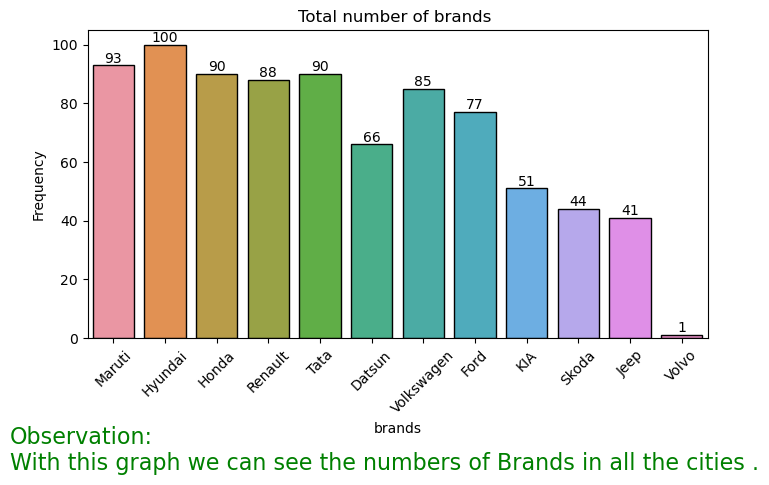

In [59]:
plt.figure(figsize=(8,4))
a = sns.countplot(x = 'BRANDS',data=Data,edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
plt.title("Total number of brands ",color='black')
a.set_xlabel("brands", fontsize =10, color='black')
a.set_ylabel("Frequency", fontsize =10, color='black')
plt.xticks(rotation=45)

note_text = "Observation:\nWith this graph we can see the numbers of Brands in all the cities ."
plt.text(-2,-45, note_text, fontsize=16, color='Green')


plt.show()


In [60]:
import pandas as pd

def count_brands_in_city(data, city):
    # Filter the DataFrame for rows with the specified city
    city_data = data[data['Location'].str.contains(city)]
    
    # Count the number of each brand in the specified city
    brand_counts = city_data[['BRANDS', 'Location']].value_counts().reset_index()
    brand_counts = brand_counts.rename(columns={0: 'Count'})
    
    return brand_counts

In [61]:
count_brands_in_city(Data, "Hyderabad")


,BRANDS,Location,Count
0,Datsun,Hyderabad,20
1,Honda,Hyderabad,20
2,Hyundai,Hyderabad,20
3,Renault,Hyderabad,20
4,Tata,Hyderabad,20
5,Maruti,Hyderabad,19
6,Volkswagen,Hyderabad,18
7,Ford,Hyderabad,16
8,Jeep,Hyderabad,10
9,KIA,Hyderabad,10


In [62]:
count_brands_in_city(Data, "Chennai")


,BRANDS,Location,Count
0,Datsun,Chennai,20
1,Ford,Chennai,20
2,Honda,Chennai,20
3,Hyundai,Chennai,20
4,Maruti,Chennai,20
5,Renault,Chennai,20
6,Tata,Chennai,20
7,Volkswagen,Chennai,20
8,Jeep,Chennai,10
9,KIA,Chennai,10


In [63]:
count_brands_in_city(Data, "Bengaluru")


,BRANDS,Location,Count
0,Ford,Bengaluru,20
1,Volkswagen,Bengaluru,20
2,Honda,Bengaluru,18
3,Renault,Bengaluru,18
4,Tata,Bengaluru,18
5,KIA,Bengaluru,17
6,Hyundai,Bengaluru,16
7,Maruti,Bengaluru,16
8,Datsun,Bengaluru,10
9,Jeep,Bengaluru,10


In [64]:
count_brands_in_city(Data, "Ahmedabad")


,BRANDS,Location,Count
0,Honda,Ahmedabad,20
1,Hyundai,Ahmedabad,20
2,Tata,Ahmedabad,20
3,Renault,Ahmedabad,18
4,Maruti,Ahmedabad,17
5,Volkswagen,Ahmedabad,17
6,Ford,Ahmedabad,11
7,Datsun,Ahmedabad,10
8,Jeep,Ahmedabad,10
9,KIA,Ahmedabad,10


In [65]:
count_brands_in_city(Data, "Indore")

,BRANDS,Location,Count
0,KIA,Indore,2
1,Volkswagen,Indore,2
2,Datsun,Indore,1
3,Honda,Indore,1
4,Jeep,Indore,1
5,Renault,Indore,1


In [116]:
Data['Location'].value_counts().reset_index().rename(columns={"index": "Location", "Location": "Counts"})

,Location,Counts
0,Chennai,190
1,Bengaluru,189
2,Hyderabad,183
3,Ahmedabad,164
4,Indore,100


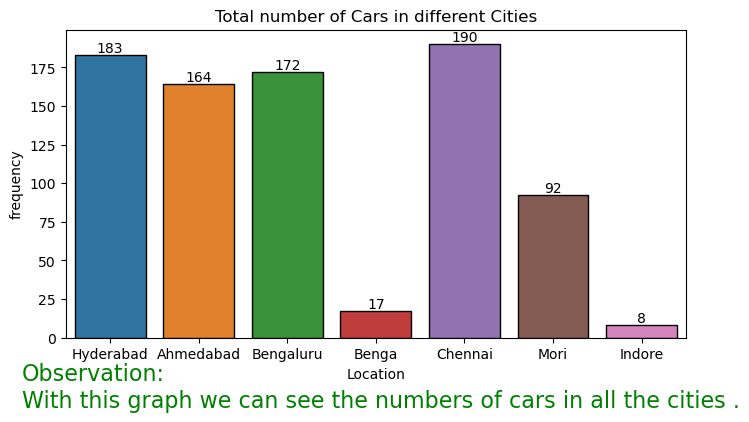

In [67]:
plt.figure(figsize=(8,4))
a = sns.countplot(x = 'Location',data=Data,edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
plt.title("Total number of Cars in different Cities",color='black')
a.set_xlabel("Location", fontsize =10, color='black')
a.set_ylabel("frequency", fontsize =10, color='black')

note_text = "Observation:\nWith this graph we can see the numbers of cars in all the cities ."
plt.text(-1,-45, note_text, fontsize=16, color='Green')

plt.show()


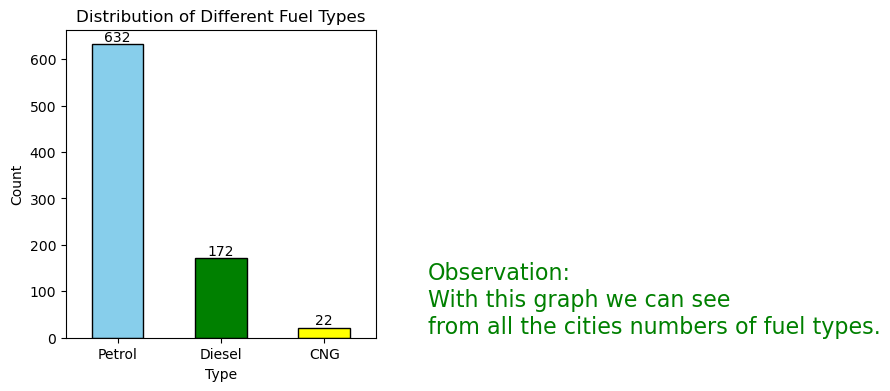

In [68]:
# Fuel
plt.figure(figsize=(4, 4))
colors = ["skyblue", "green", "yellow", "pink", "blue", "darkgreen"]

a = Data["Fuel"].value_counts().plot(kind='bar', color=colors, edgecolor='black')

for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Different Fuel Types')

plt.xticks(rotation=0)

note_text = "Observation:\nWith this graph we can see\nfrom all the cities numbers of fuel types."
plt.text(3,10, note_text, fontsize=16, color='Green')

plt.show()


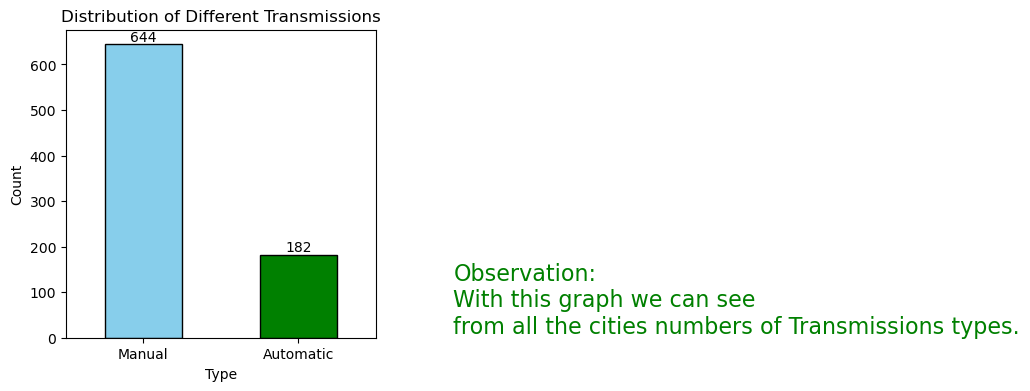

In [69]:


# Transmission
plt.figure(figsize=(4, 4))
colors = ["skyblue", "green", "yellow", "pink", "blue", "darkgreen"]

a = Data["Transmission"].value_counts().plot(kind='bar', color=colors, edgecolor='black')

for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Different Transmissions')

plt.xticks(rotation=0)

note_text = "Observation:\nWith this graph we can see\nfrom all the cities numbers of Transmissions types."
plt.text(2,10, note_text, fontsize=16, color='Green')

plt.show()



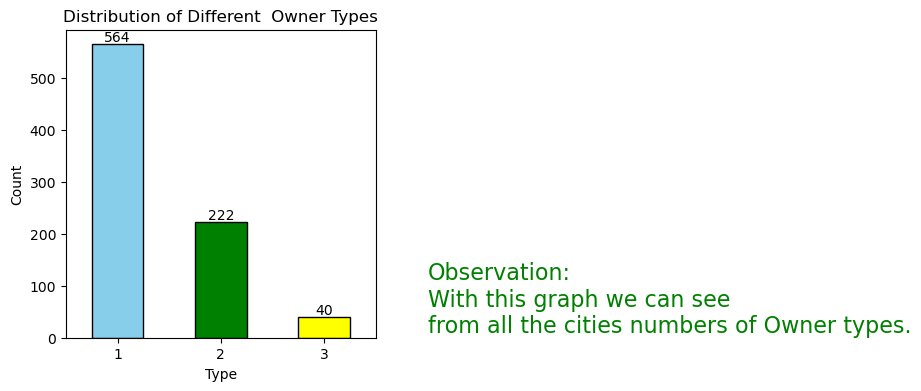

In [70]:

# OWNER
plt.figure(figsize=(4, 4))
colors = ["skyblue", "green", "yellow", "pink", "blue", "darkgreen"]

a = Data["OWNER"].value_counts().plot(kind='bar', color=colors, edgecolor='black')

for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Different  Owner Types')


plt.xticks(rotation=0)

note_text = "Observation:\nWith this graph we can see\nfrom all the cities numbers of Owner types."
plt.text(3,10, note_text, fontsize=16, color='Green')

plt.show()




In [118]:
model_year_counts=Data['MODEL_YEAR'].value_counts().reset_index().rename(columns={"index": "MODEL_YEAR", "MODEL_YEAR": "Counts"})
model_year_counts

,MODEL_YEAR,Counts
0,2018,138
1,2017,118
2,2019,102
3,2021,92
4,2016,90
5,2020,74
6,2022,56
7,2015,46
8,2014,38
9,2013,25


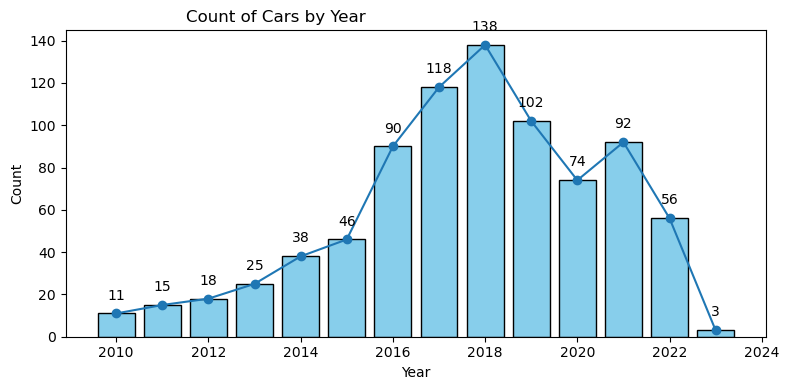

In [72]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
counts = [11, 15, 18, 25, 38, 46, 90, 118, 138, 102, 74, 92, 56, 3]

plt.figure(figsize=(8, 4))
plt.plot(years, counts, marker='o', linestyle='-')
plt.bar(years, counts, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Count of Cars by Year', x=0.3)
plt.tight_layout()

# Show values 
for x, y in zip(years, counts):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')



plt.show()



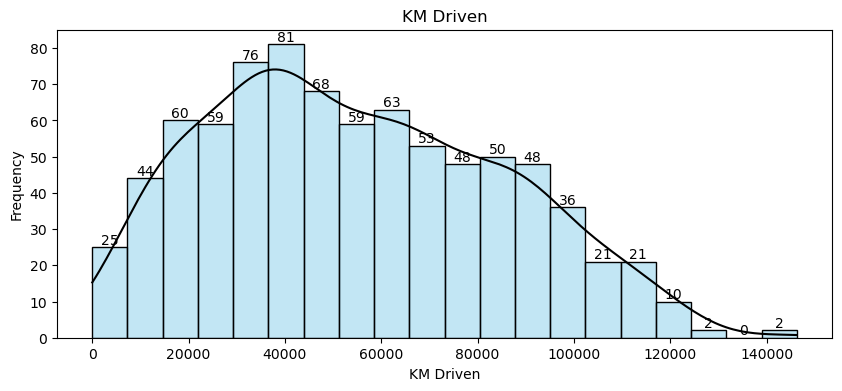

In [73]:
plt.figure(figsize=(10,4))# Adjust the figure size if needed

a=sns.histplot(Data['KM_DRIVEN'], bins=20, kde=True, color='skyblue', edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
a.lines[0].set_color('black')


plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.title('KM Driven')

plt.show()


In [74]:
Data['Location'].value_counts().reset_index()


,index,Location
0,Chennai,190
1,Hyderabad,183
2,Bengaluru,172
3,Ahmedabad,164
4,Mori,92
5,Benga,17
6,Indore,8


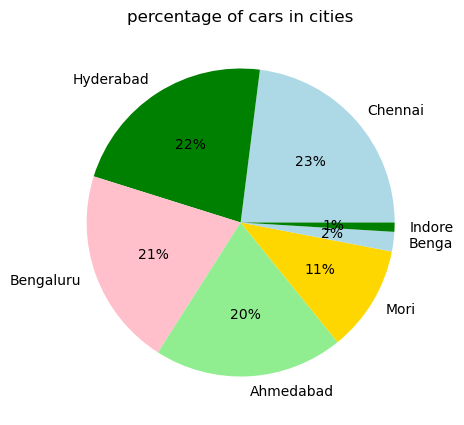

In [75]:
# location
plt.figure(figsize=(5,5)) 
colors = ["lightblue", "green", "pink","lightgreen","gold"]

plt.pie(Data["Location"].value_counts(), labels=Data["Location"].value_counts().index, autopct='%1.0f%%',colors=colors)
plt.title("percentage of cars in cities")
plt.show()

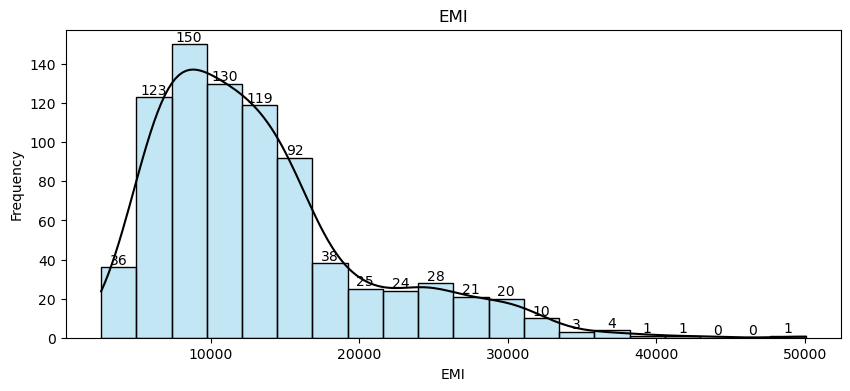

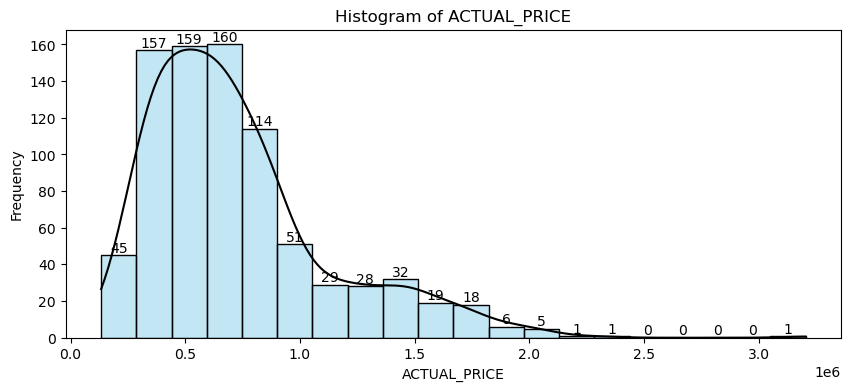

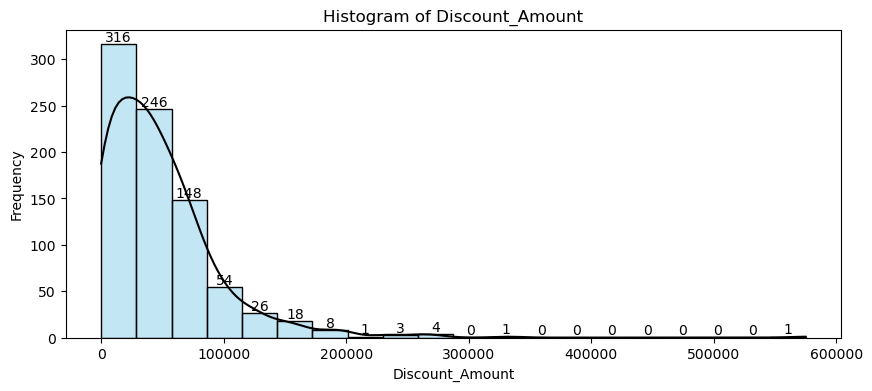

In [76]:
# EMI
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed

a = sns.histplot(Data['EMI'], bins=20, kde=True, color='skyblue', edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

a.lines[0].set_color('black')

plt.xlabel('EMI')
plt.ylabel('Frequency')
plt.title('EMI')

plt.show()


# plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

# sns.boxplot(data=Data, y='EMI', color='skyblue')

# plt.ylabel('EMI')
# plt.title('Box Plot of EMI')

# plt.show()


# 'ACTUAL_PRICE'
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed

a = sns.histplot(Data['ACTUAL_PRICE'], bins=20, kde=True, color='skyblue', edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

a.lines[0].set_color('black')

plt.xlabel('ACTUAL_PRICE')
plt.ylabel('Frequency')
plt.title('Histogram of ACTUAL_PRICE')

plt.show()


# plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

# sns.boxplot(data=Data, y=''ACTUAL_PRICE'', color='skyblue')

# plt.ylabel('EMI')
# plt.title('Box Plot of EMI')

# plt.show()



## 2.5le6" on a graph, it means 2.5 million


# 'Discount_Amount'
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed

a = sns.histplot(Data['Discount_Amount'], bins=20, kde=True, color='skyblue', edgecolor='black')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

a.lines[0].set_color('black')

plt.xlabel('Discount_Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Discount_Amount')

plt.show()


# plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

# sns.boxplot(data=Data, y=''Discount_Amount'', color='skyblue')

# plt.ylabel('EMI')
# plt.title('Box Plot of EMI')

# plt.show()



## 2.5le6" on a graph, it means 2.5 million


In [77]:
age=Data["CAR_AGE"].value_counts().reset_index()
age

,index,CAR_AGE
0,5,138
1,6,118
2,4,102
3,2,92
4,7,90
5,3,74
6,1,56
7,8,46
8,9,38
9,10,25


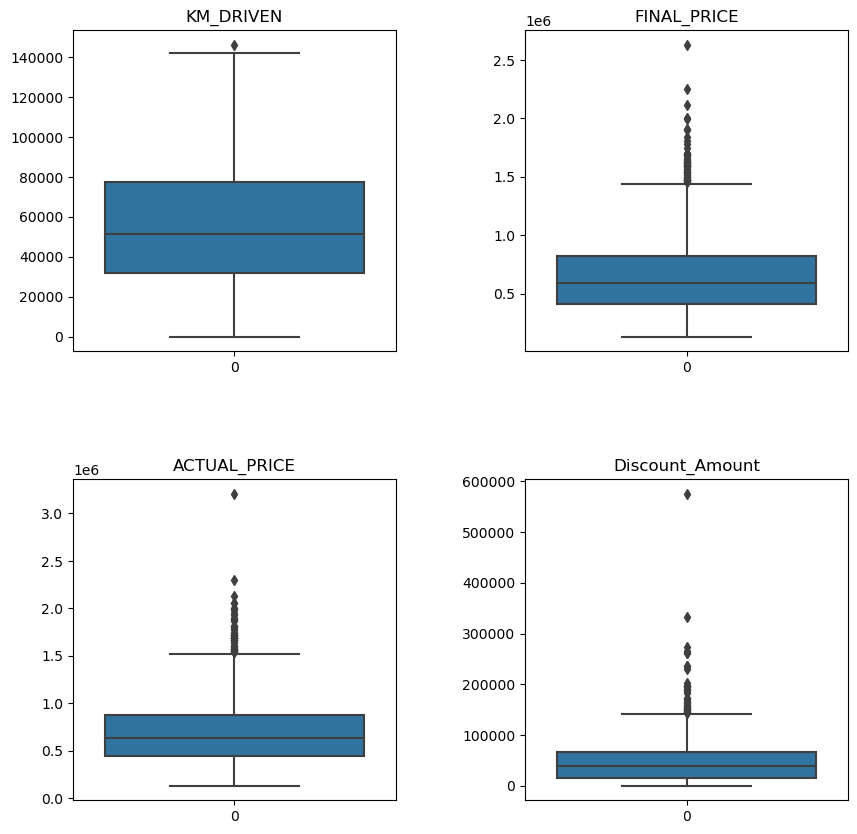

In [78]:
fig, axs= plt.subplots(figsize=(10,10), ncols=2, nrows=2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.boxplot(Data["KM_DRIVEN"],ax=axs[0][0]).set_title("KM_DRIVEN")
sns.boxplot(Data["FINAL_PRICE"],ax=axs[0][1]).set_title("FINAL_PRICE")
sns.boxplot(Data["ACTUAL_PRICE"],ax=axs[1][0]).set_title("ACTUAL_PRICE")
sns.boxplot(Data["Discount_Amount"],ax=axs[1][1]).set_title("Discount_Amount")
plt.show()

# Numerical vs. Numerical data
# Numerical vs. categorical data

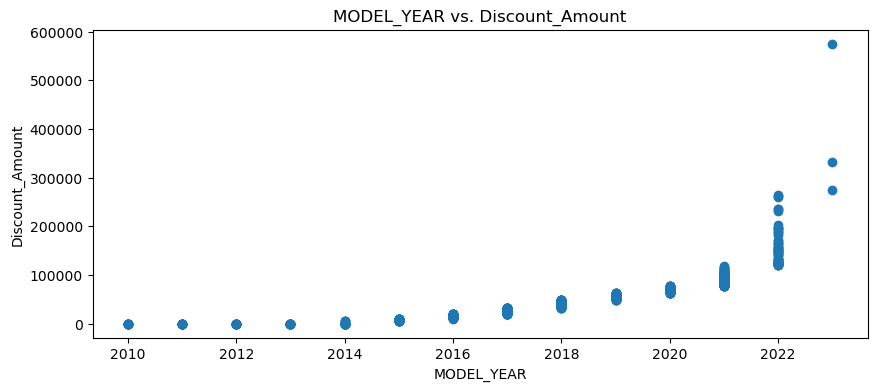

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\610791465.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x=a, y=b, ci=None)


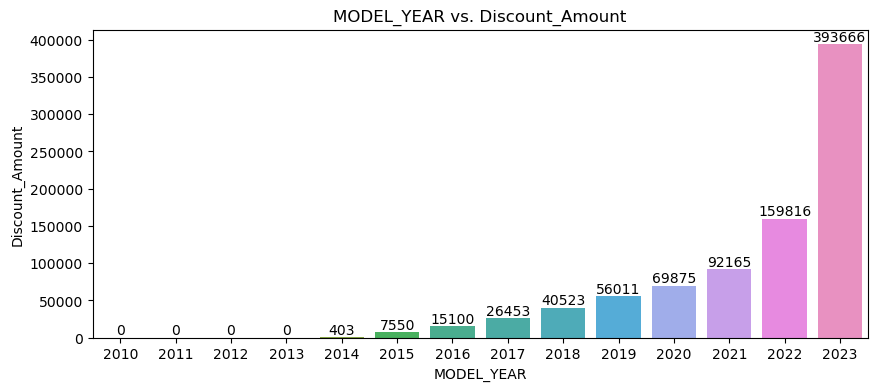

In [79]:
a = np.sort(Data["MODEL_YEAR"])
b = np.sort(Data["Discount_Amount"])
c = "MODEL_YEAR"
d = "Discount_Amount"

# Scatter Plot
plt.figure(figsize=(10, 4))
plt.scatter(a, b)
plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Line Plot
# plt.figure(figsize=(10, 10))
# plt.plot(a, b, marker='o', linestyle='-')
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# barplot
plt.figure(figsize=(10, 4))
a=sns.barplot(x=a, y=b, ci=None)
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()





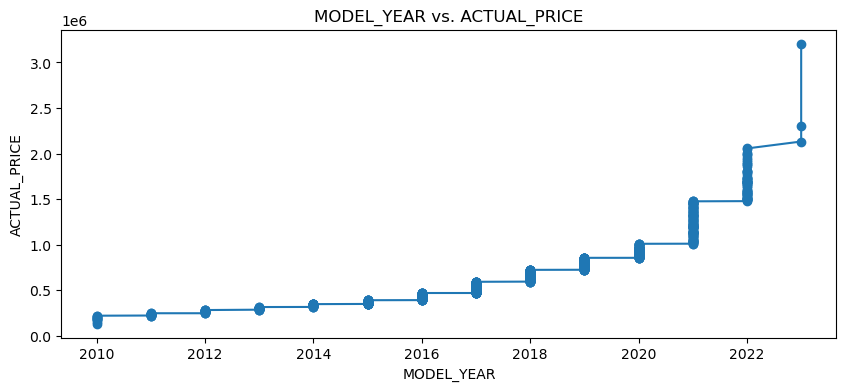

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\2264449692.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x=a, y=b, ci=None)


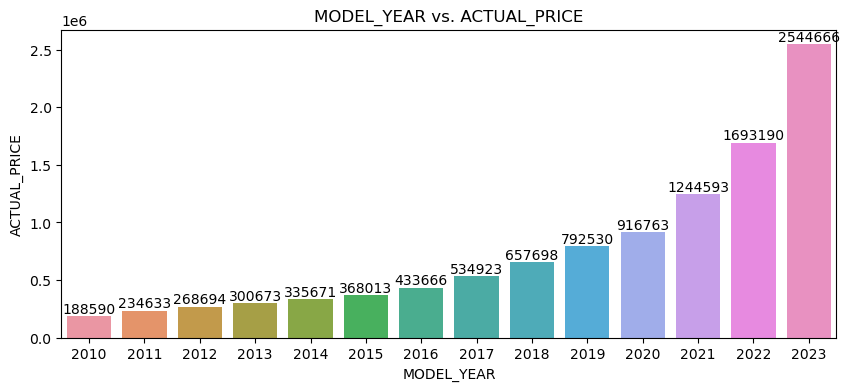

In [80]:
a = np.sort(Data['MODEL_YEAR'])
b = np.sort(Data['ACTUAL_PRICE'])
c = "MODEL_YEAR"
d = "ACTUAL_PRICE"

# # Scatter Plot
# plt.scatter(a, b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# Line Plot
plt.figure(figsize=(10, 4))
plt.plot(a, b, marker='o', linestyle='-')
plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Box Plot
# sns.boxplot(x=a, y=b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# barplot
plt.figure(figsize=(10, 4))
a=sns.barplot(x=a, y=b, ci=None)
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Heatmap
# corr_matrix = Data.corr()
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


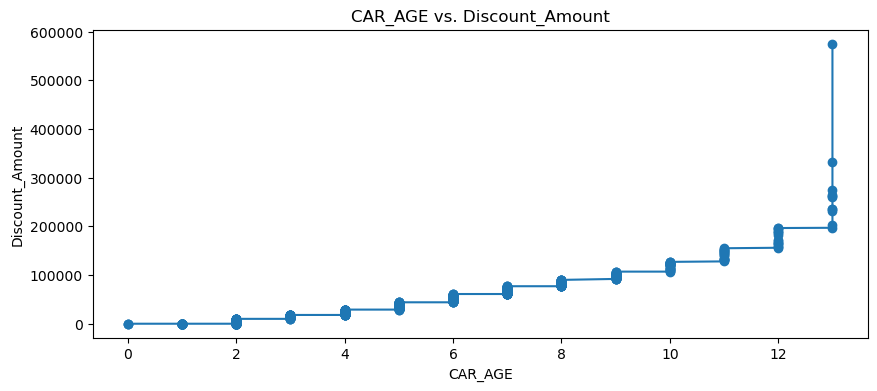

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\4199275015.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x=a, y=b, ci=None)


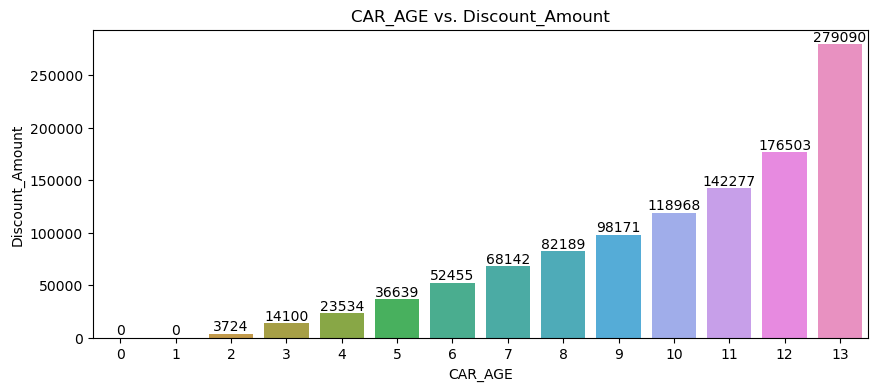

In [81]:
a = np.sort(Data['CAR_AGE'])
b = np.sort(Data['Discount_Amount'])
c = "CAR_AGE"
d = "Discount_Amount"

# # Scatter Plot
# plt.scatter(a, b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# Line Plot
plt.figure(figsize=(10, 4))
plt.plot(a, b, marker='o', linestyle='-')
plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Box Plot
# sns.boxplot(x=a, y=b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# barplot
plt.figure(figsize=(10, 4))
a=sns.barplot(x=a, y=b, ci=None)
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Heatmap
# corr_matrix = Data.corr()
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()



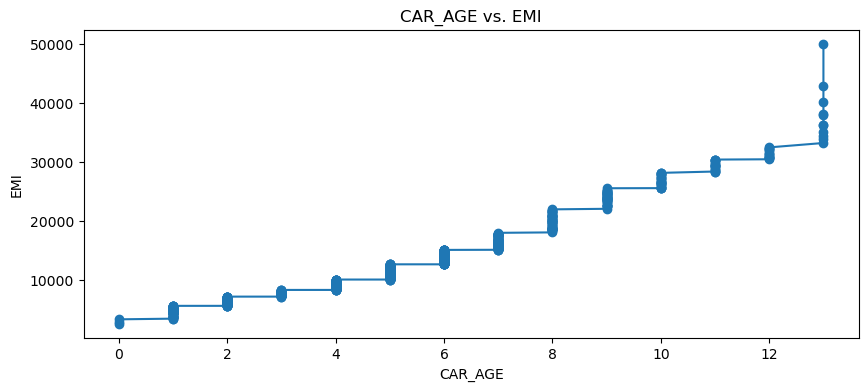

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\414335621.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x=a, y=b, ci=None)


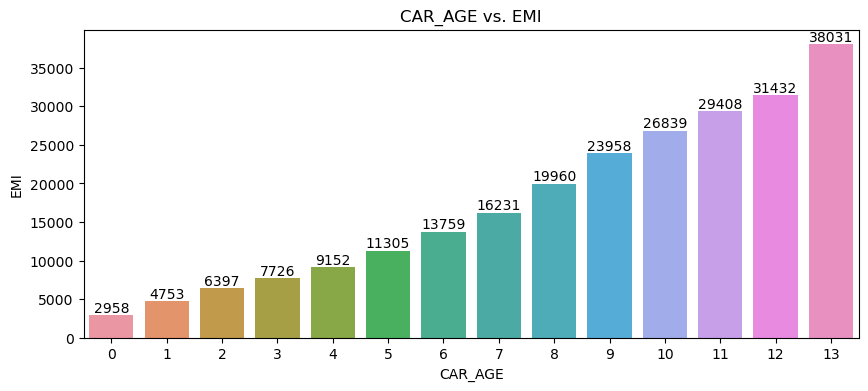

In [82]:


a = np.sort(Data['CAR_AGE'])
b = np.sort(Data['EMI'])
c = "CAR_AGE"
d = "EMI"

# # Scatter Plot
# plt.scatter(a, b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# Line Plot
plt.figure(figsize=(10, 4))
plt.plot(a, b, marker='o', linestyle='-')
plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Box Plot
# sns.boxplot(x=a, y=b)
# plt.xlabel(c)
# plt.ylabel(d)
# plt.title(f"{c} vs. {d}")
# plt.show()

# barplot
plt.figure(figsize=(10, 4))
a=sns.barplot(x=a, y=b, ci=None)
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel(c)
plt.ylabel(d)
plt.title(f"{c} vs. {d}")
plt.show()

# # Heatmap
# corr_matrix = Data.corr()
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()



# Numerical vs. Categorical: Box Plot


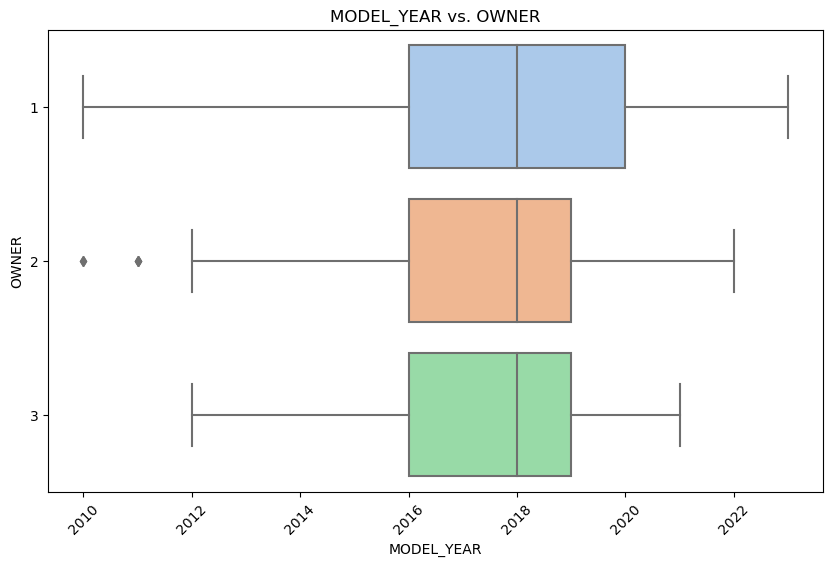

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\2482032856.py:53: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=q, y=p, palette='pastel')
C:\Users\kotha\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kotha\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kotha\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kotha\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease t

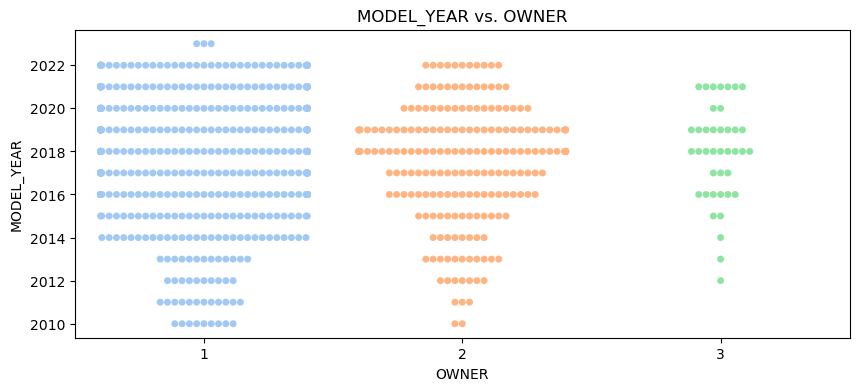

In [83]:
p = np.sort(Data['MODEL_YEAR'])
q = Data['OWNER'].astype('category')  # Assuming OWNER is a categorical variable
r = "MODEL_YEAR"
s = "OWNER"

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=p, y=q, palette='pastel')
plt.xlabel(r)
plt.ylabel(s)
plt.title(f"{r} vs. {s}")
plt.xticks(rotation=45)
plt.show()

# # Bar Plot
# plt.figure(figsize=(8, 6))
# sns.barplot(x=p, y=q, ci=None, palette='pastel')
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge')
# plt.xlabel(r)
# plt.ylabel(s)
# plt.yticks([1, 2, 3])
# plt.title(f"{r} vs. {s}")
# plt.xticks(rotation=45)
# plt.show()

# # Count Plot
# plt.figure(figsize=(6, 4))
# owner_counts = q.value_counts().sort_index()
# a = sns.barplot(x=owner_counts.index, y=owner_counts.values, palette='pastel')
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge')
# a.legend(title=s, labels=q.unique())
# plt.xlabel(r)
# plt.ylabel("Frequency")
# plt.title(f"{r} vs. Frequency")
# a.set_xticklabels(p, rotation=45)


# # Violin Plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x=p, y=q, palette='pastel')
# plt.xlabel(r)
# plt.ylabel(s)
# plt.title(f"{r} vs. {s}")
# plt.xticks(rotation=45)
# plt.show()

# Swarm Plot
plt.figure(figsize=(10, 4))

# Create a swarm plot with 'OWNER' on the y-axis
sns.swarmplot(x=q, y=p, palette='pastel')
plt.ylabel(r)
plt.xlabel(s)
plt.title(f"{r} vs. {s}")

plt.show()


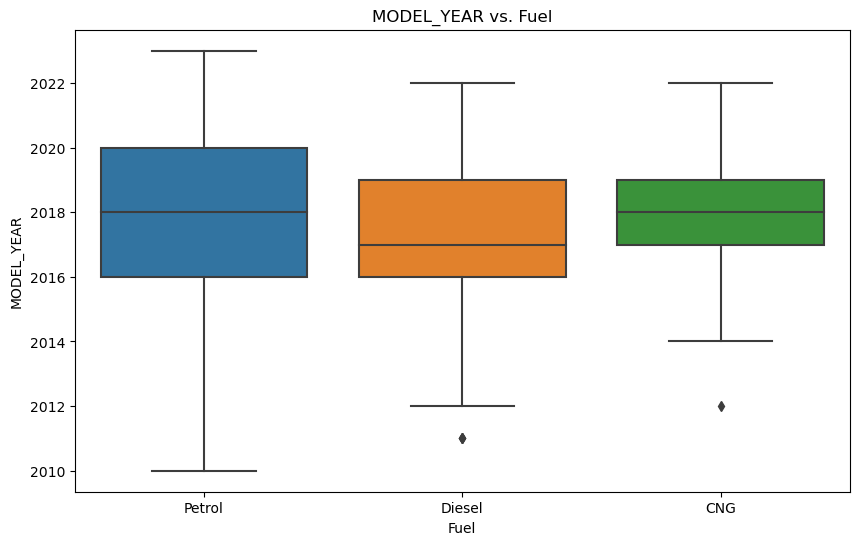

In [84]:
# Numerical vs. Categorical: Box Plot
# MODEL_YEAR vs. Fuel

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['Fuel'], y=Data['MODEL_YEAR'])
plt.xlabel('Fuel')
plt.ylabel('MODEL_YEAR')
plt.title('MODEL_YEAR vs. Fuel')
plt.xticks(rotation=0)
plt.show()





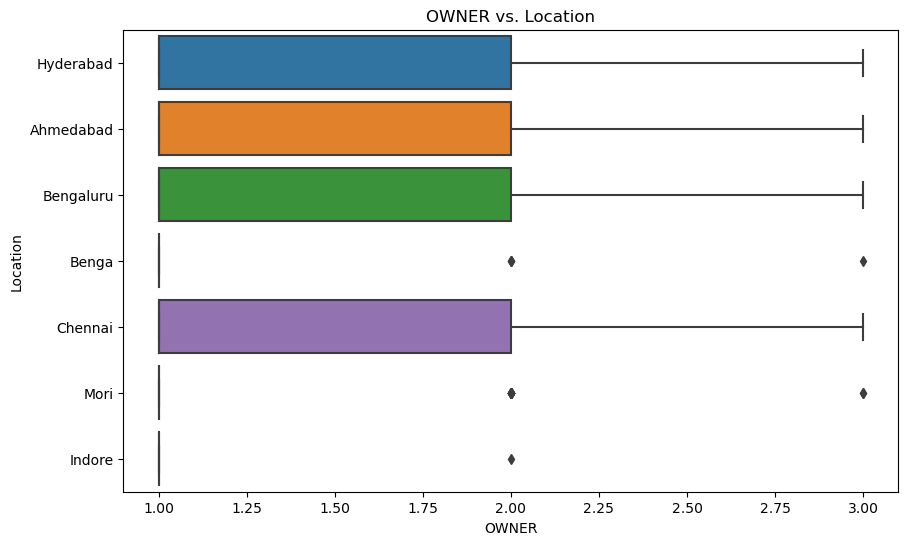

In [85]:
# Numerical vs. Categorical: Box Plot
# location vs. owner

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['OWNER'], y=Data['Location'])
plt.xlabel('OWNER')
plt.ylabel('Location')
plt.title('OWNER vs. Location')
plt.xticks(rotation=0)
plt.show()


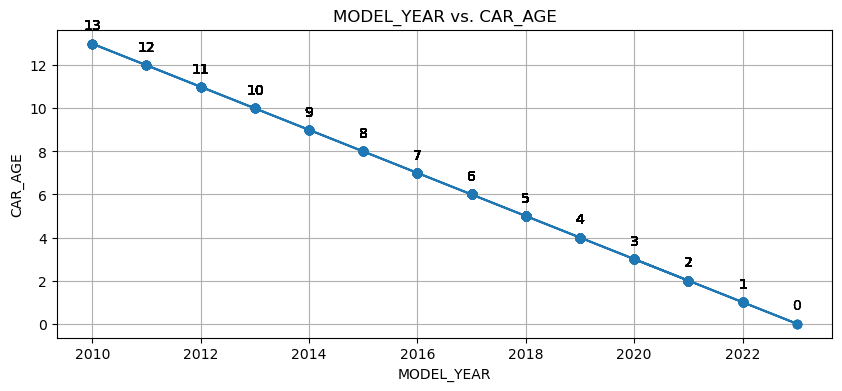

In [86]:
# Numerical vs. Categorical: Box Plot
# MODEL_YEAR vs. CAR_AGE

plt.figure(figsize=(10, 4))

plt.plot(Data['MODEL_YEAR'], Data['CAR_AGE'], marker='o', linestyle='-')

for x, y in zip(Data['MODEL_YEAR'], Data['CAR_AGE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('MODEL_YEAR')
plt.ylabel('CAR_AGE')
plt.title('MODEL_YEAR vs. CAR_AGE')
plt.grid()
plt.show()


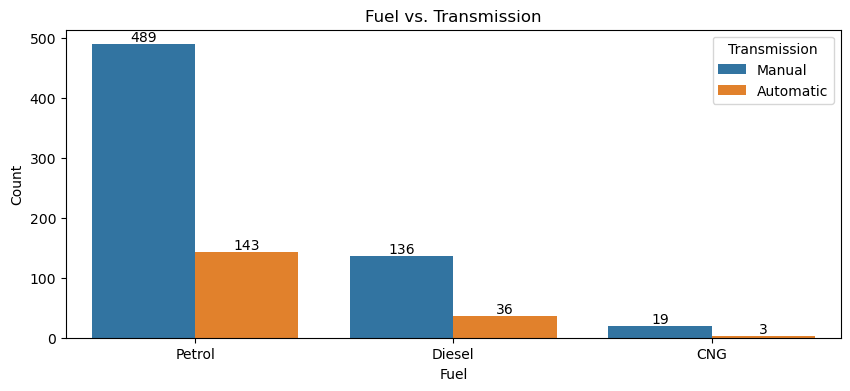

In [87]:
# Categorical vs. Categorical: Count Plot
# Fuel vs. Transmission

plt.figure(figsize=(10, 4))
a=sns.countplot(data=Data, x='Fuel', hue='Transmission')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title('Fuel vs. Transmission')
plt.show()

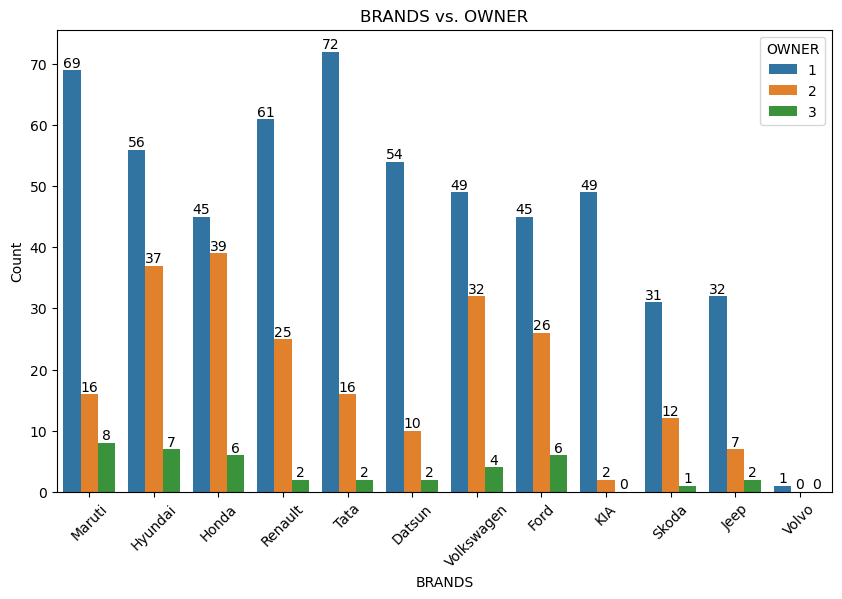

In [88]:
# Categorical vs. Categorical: Stacked Bar Plot
# BRANDS vs. OWNER

plt.figure(figsize=(10, 6))
a=sns.countplot(data=Data, x='BRANDS', hue='OWNER')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')

plt.xlabel('BRANDS')
plt.ylabel('Count')
plt.title('BRANDS vs. OWNER')
plt.xticks(rotation=45)
plt.show()

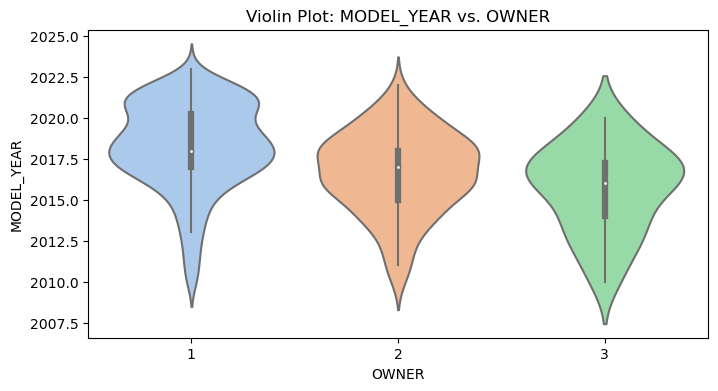

In [89]:
# MODEL_YEAR vs. OWNER using a violin plot.

plt.figure(figsize=(8, 4))
sns.violinplot(x=Data['OWNER'], y=Data['MODEL_YEAR'], palette='pastel')
plt.xlabel('OWNER')
plt.ylabel('MODEL_YEAR')
plt.title('Violin Plot: MODEL_YEAR vs. OWNER')
plt.xticks(rotation=0)
plt.show()



C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\515801961.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.barplot(x='Fuel',y='KM_DRIVEN',data=Data,palette='icefire',ci=None)


Text(0.5, 1.0, 'Driven (Kms) of vehicle based on Fuel')

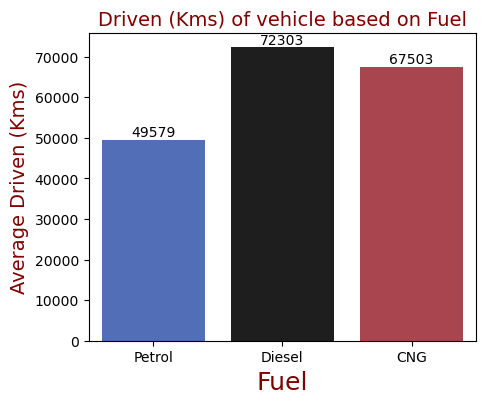

In [90]:
plt.figure(figsize=(5,4))
a = sns.barplot(x='Fuel',y='KM_DRIVEN',data=Data,palette='icefire',ci=None)
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
a.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
a.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')


C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\3252676413.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.barplot(x='Fuel',y='EMI',data=Data,palette='icefire',ci=None)


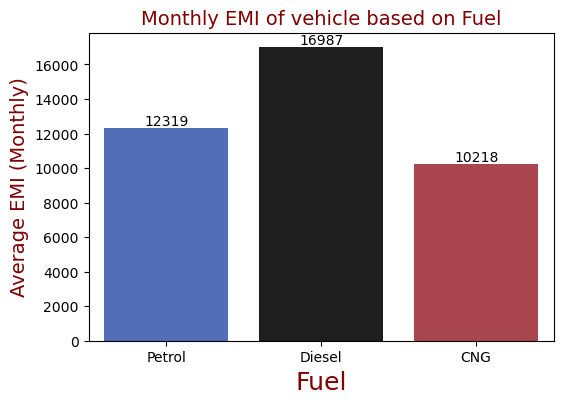

In [91]:
f, axes = plt.subplots(figsize=(6,4))
a = sns.barplot(x='Fuel',y='EMI',data=Data,palette='icefire',ci=None)
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
a.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
a.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.show()

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\973152216.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='Fuel', y='FINAL_PRICE', data=Data, ax=axes[0,0],ci=None)
C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\973152216.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='MODEL_YEAR', y='FINAL_PRICE', data=Data, ax=axes[0,1],ci=None)
C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\973152216.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='Location', y='FINAL_PRICE', data=Data, ax=axes[0,2],ci=None)
C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\973152216.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='OWNER', y='FINAL_PRICE', data=Data, ax=axes[1,0],ci=None)
C:\Users\kotha\AppData\Local\Temp\ipykernel_37

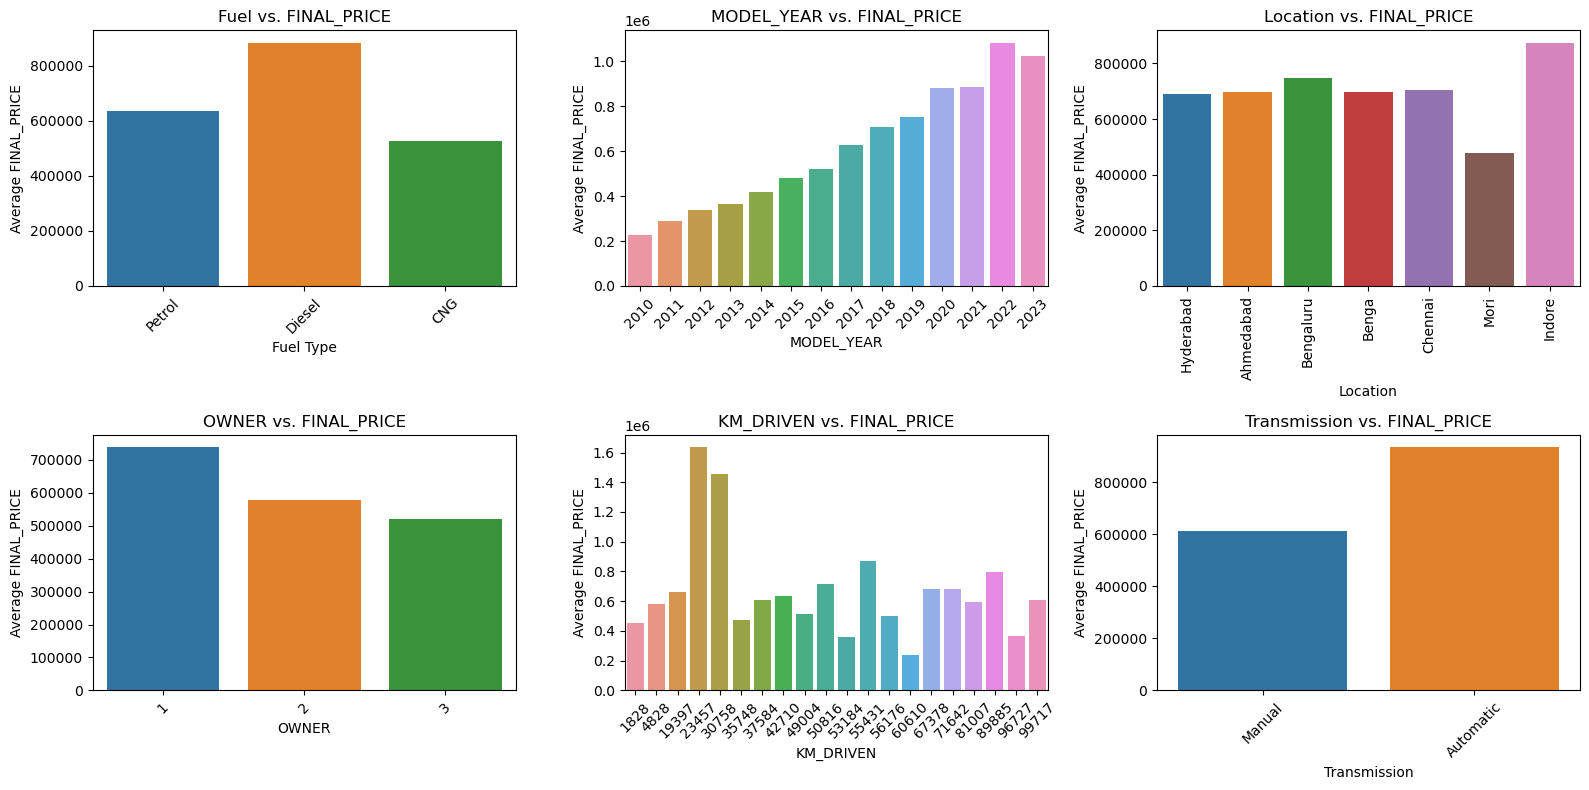

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Plot 1: Fuel vs. FINAL_PRICE
a=sns.barplot(x='Fuel', y='FINAL_PRICE', data=Data, ax=axes[0,0],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[0,0].set_title('Fuel vs. FINAL_PRICE')
axes[0,0].set_xlabel('Fuel Type')
axes[0,0].set_ylabel('Average FINAL_PRICE')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: MODEL_YEAR vs. FINAL_PRICE
a=sns.barplot(x='MODEL_YEAR', y='FINAL_PRICE', data=Data, ax=axes[0,1],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[0,1].set_title('MODEL_YEAR vs. FINAL_PRICE')
axes[0,1].set_xlabel('MODEL_YEAR')
axes[0,1].set_ylabel('Average FINAL_PRICE')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Location vs. FINAL_PRICE
a=sns.barplot(x='Location', y='FINAL_PRICE', data=Data, ax=axes[0,2],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[0,2].set_title('Location vs. FINAL_PRICE')
axes[0,2].set_xlabel('Location')
axes[0,2].set_ylabel('Average FINAL_PRICE')
axes[0,2].tick_params(axis='x', rotation=90)

a=sns.barplot(x='OWNER', y='FINAL_PRICE', data=Data, ax=axes[1,0],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[1,0].set_title('OWNER vs. FINAL_PRICE')
axes[1,0].set_xlabel('OWNER')
axes[1,0].set_ylabel('Average FINAL_PRICE')
axes[1,0].tick_params(axis='x', rotation=45)


sampled_data = Data.sample(n=20, random_state=1)
a=sns.barplot(x='KM_DRIVEN', y='FINAL_PRICE', data=sampled_data, ax=axes[1,1],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[1,1].set_title('KM_DRIVEN vs. FINAL_PRICE')
axes[1,1].set_xlabel('KM_DRIVEN')
axes[1,1].set_ylabel('Average FINAL_PRICE')
axes[1,1].tick_params(axis='x', rotation=45)


a=sns.barplot(x='Transmission', y='FINAL_PRICE', data=Data, ax=axes[1,2],ci=None)
# for i in a.containers:
#     a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
axes[1,2].set_title('Transmission vs. FINAL_PRICE')
axes[1,2].set_xlabel('Transmission')
axes[1,2].set_ylabel('Average FINAL_PRICE')
axes[1,2].tick_params(axis='x', rotation=45)




plt.tight_layout()
plt.show()


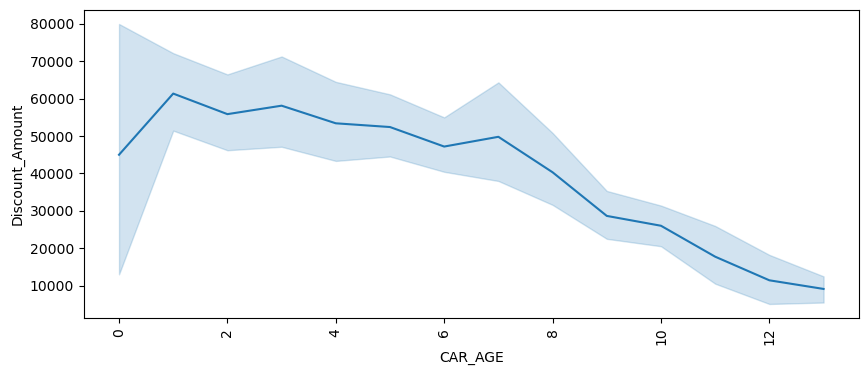

In [93]:
plt.figure(figsize=(10,4))

sns.lineplot(x="CAR_AGE",y ="Discount_Amount",data= Data)
plt.xticks(rotation=90)
plt.show()

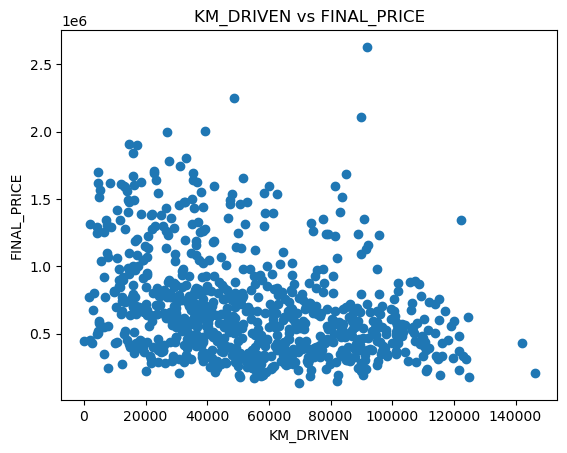

In [94]:
#Scatter Plot:

plt.scatter(Data['KM_DRIVEN'], Data['FINAL_PRICE'])
plt.xlabel('KM_DRIVEN')
plt.ylabel('FINAL_PRICE')
plt.title('KM_DRIVEN vs FINAL_PRICE')
plt.show()

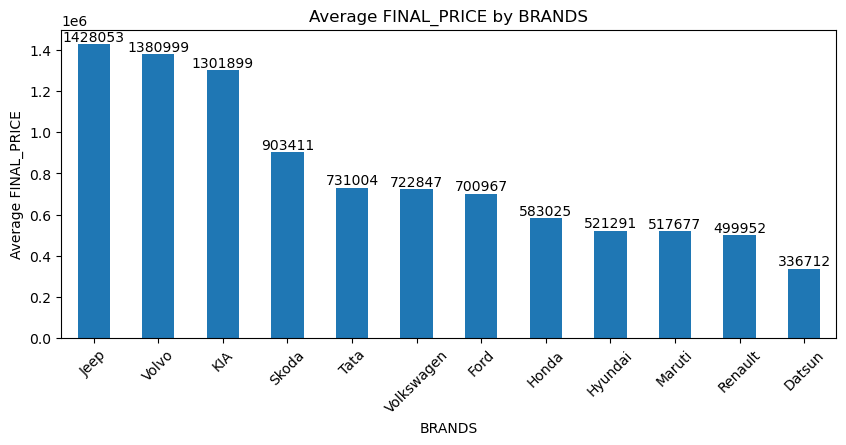

In [95]:
# Grouped Analysis:
grouped_data = Data.groupby('BRANDS')['FINAL_PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
a=grouped_data.plot(kind='bar')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
plt.title("Average FINAL_PRICE by BRANDS")
plt.xlabel("BRANDS")
plt.ylabel("Average FINAL_PRICE")
plt.xticks(rotation=45)
plt.show()


In [96]:
hyd_city = Data.loc[(Data['Location'] == 'Hyderabad')]
ah_city = Data.loc[(Data['Location'] == 'Ahmedabad')]
ben_city = Data.loc[(Data['Location'] == 'Bengaluru')]
ch_city = Data.loc[(Data['Location'] == 'Chennai')]
ind_city = Data.loc[(Data['Location'] == 'Indore')]

In [97]:
brand_counts_hyd= hyd_city.groupby(['BRANDS', 'Location']).size().reset_index(name='Count')
# brand_counts_ah= ah_city.groupby(['BRANDS', 'Location']).size().reset_index(name='Count')
# brand_counts_ben= ben_city.groupby(['BRANDS', 'Location']).size().reset_index(name='Count')
# brand_counts_ch= ch_city.groupby(['BRANDS', 'Location']).size().reset_index(name='Count')
# brand_counts_ind= ind_city.groupby(['BRANDS', 'Location']).size().reset_index(name='Count')

brand_counts_hyd
# brand_counts_ah
# brand_counts_ben
# brand_counts_ch
# brand_counts_ind

,BRANDS,Location,Count
0,Datsun,Hyderabad,20
1,Ford,Hyderabad,16
2,Honda,Hyderabad,20
3,Hyundai,Hyderabad,20
4,Jeep,Hyderabad,10
5,KIA,Hyderabad,10
6,Maruti,Hyderabad,19
7,Renault,Hyderabad,20
8,Skoda,Hyderabad,10
9,Tata,Hyderabad,20


In [98]:
fuel_gear = Data.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=True).reset_index()
fuel_gear

,Fuel,Location
0,CNG,22
1,Diesel,172
2,Petrol,632


In [99]:
f_counts_hyd= hyd_city.groupby(['Fuel', 'Location']).size().reset_index(name='Count')
# f_counts_ah= ah_city.groupby(['Fuel', 'Location']).size().reset_index(name='Count')
# f_counts_ben= ben_city.groupby(['Fuel', 'Location']).size().reset_index(name='Count')
# f_counts_ch= ch_city.groupby(['Fuel', 'Location']).size().reset_index(name='Count')
# f_counts_ind= ind_city.groupby(['Fuel', 'Location']).size().reset_index(name='Count')

f_counts_hyd
# f_counts_ah
# f_counts_ben
# f_counts_ch
# f_counts_ind

,Fuel,Location,Count
0,Diesel,Hyderabad,43
1,Petrol,Hyderabad,140


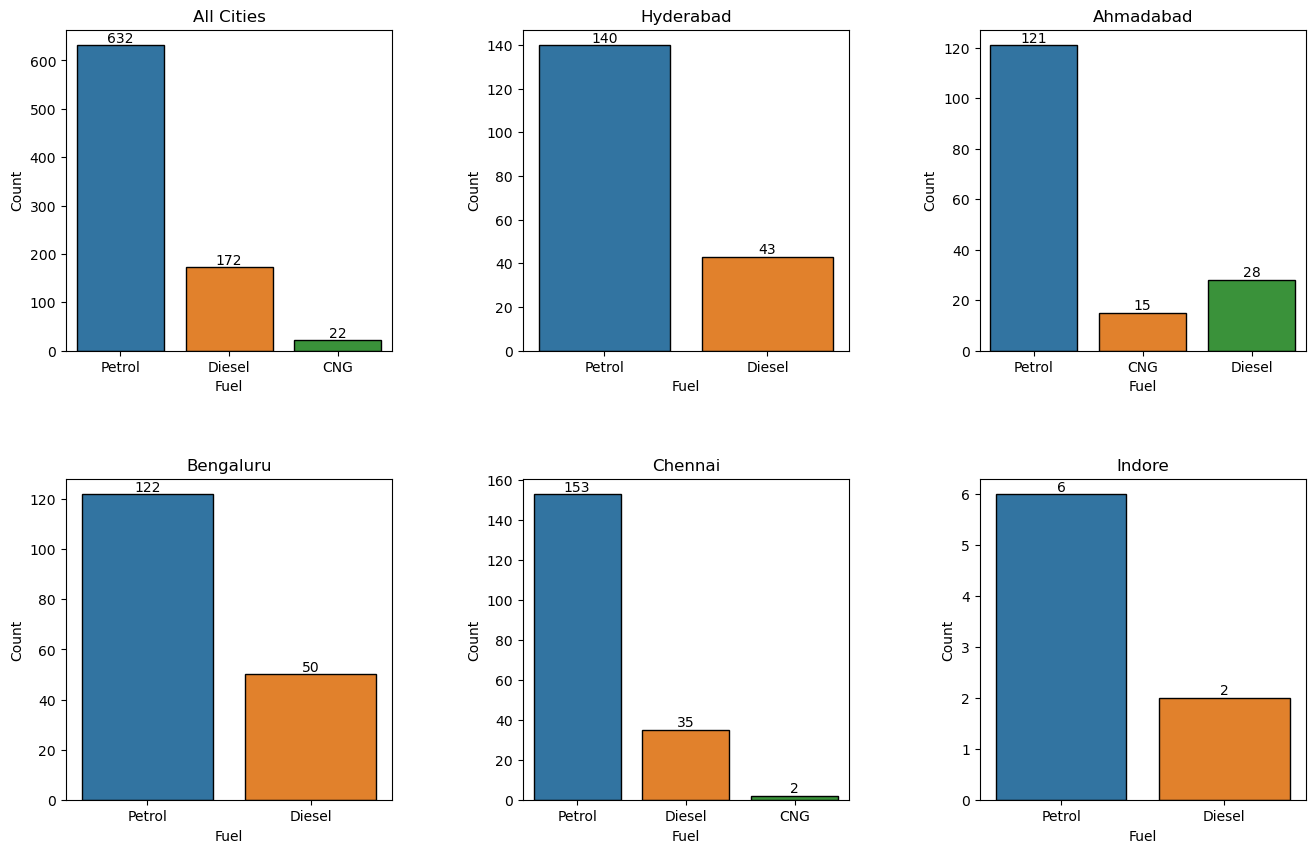

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

a = sns.countplot(x ='Fuel',data=Data,edgecolor='black',ax=axes[0,0])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[0,0].set_title('All Cities')
axes[0,0].set_xlabel("Fuel", fontsize =10, color='black')
axes[0,0].set_ylabel("Count", fontsize =10, color='black')
axes[0,0].tick_params(axis='x', rotation=0)

a = sns.countplot(x ='Fuel',data=hyd_city,edgecolor='black',ax=axes[0,1])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[0,1].set_title('Hyderabad')
axes[0,1].set_xlabel("Fuel", fontsize =10, color='black')
axes[0,1].set_ylabel("Count", fontsize =10, color='black')
axes[0,1].tick_params(axis='x', rotation=0)

a = sns.countplot(x ='Fuel',data=ah_city,edgecolor='black',ax=axes[0,2])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[0,2].set_title('Ahmadabad')
axes[0,2].set_xlabel("Fuel", fontsize =10, color='black')
axes[0,2].set_ylabel("Count", fontsize =10, color='black')
axes[0,2].tick_params(axis='x', rotation=0)


a = sns.countplot(x ='Fuel',data=ben_city,edgecolor='black',ax=axes[1,0])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[1,0].set_title('Bengaluru')
axes[1,0].set_xlabel("Fuel", fontsize =10, color='black')
axes[1,0].set_ylabel("Count", fontsize =10, color='black')
axes[1,0].tick_params(axis='x', rotation=0)


a = sns.countplot(x ='Fuel',data=ch_city,edgecolor='black',ax=axes[1,1])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[1,1].set_title('Chennai')
axes[1,1].set_xlabel("Fuel", fontsize =10, color='black')
axes[1,1].set_ylabel("Count", fontsize =10, color='black')
axes[1,1].tick_params(axis='x', rotation=0)


a = sns.countplot(x ='Fuel',data=ind_city,edgecolor='black',ax=axes[1,2])
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge')
axes[1,2].set_title('Indore')
axes[1,2].set_xlabel("Fuel", fontsize =10, color='black')
axes[1,2].set_ylabel("Count", fontsize =10, color='black')
axes[1,2].tick_params(axis='x', rotation=0)

plt.show()


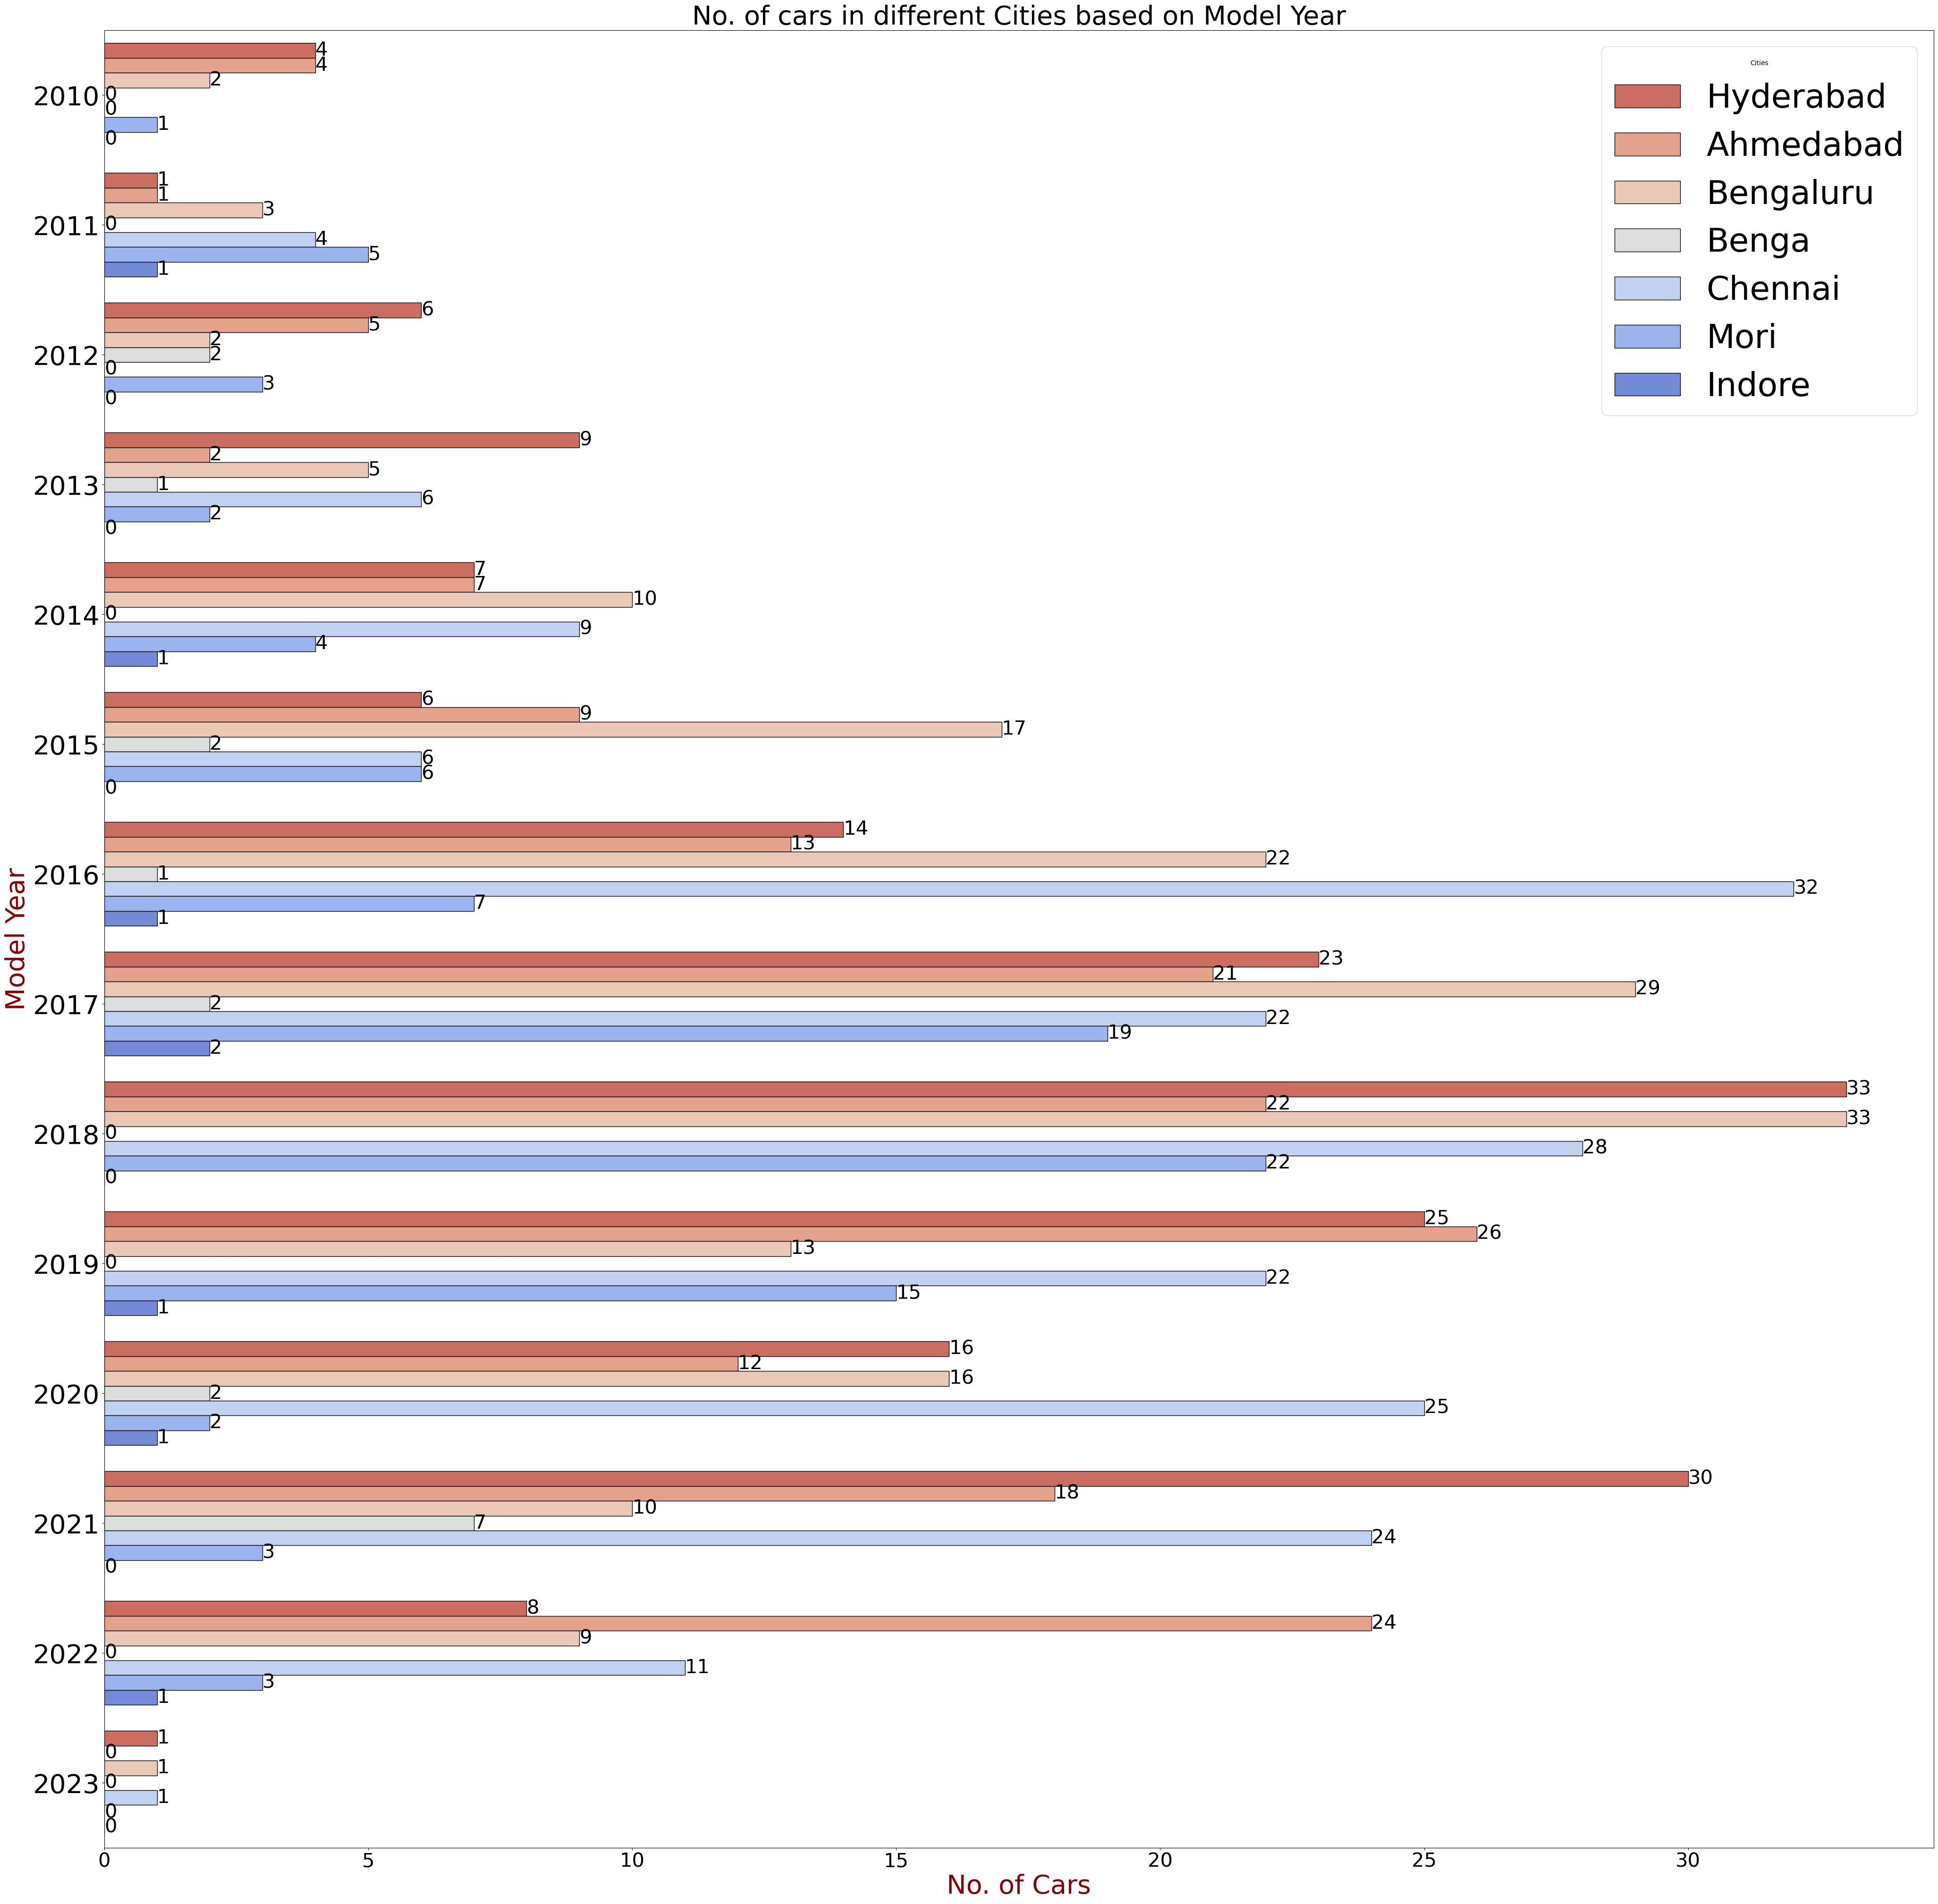

In [101]:
fig, ax = plt.subplots(figsize=(50, 50))
a = sns.countplot(y = 'MODEL_YEAR',hue='Location',data=Data,edgecolor='black',palette='coolwarm_r')
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge',fontsize=30)
a.set_ylabel("Model Year", fontsize = 40,color='darkred')
a.set_xlabel("No. of Cars", fontsize =40, color='darkred')
plt.title("No. of cars in different Cities based on Model Year",fontsize=40,color='black')
plt.legend(loc='upper right',title='Cities',prop={'size': 50})
plt.show()

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\3252676413.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.barplot(x='Fuel',y='EMI',data=Data,palette='icefire',ci=None)


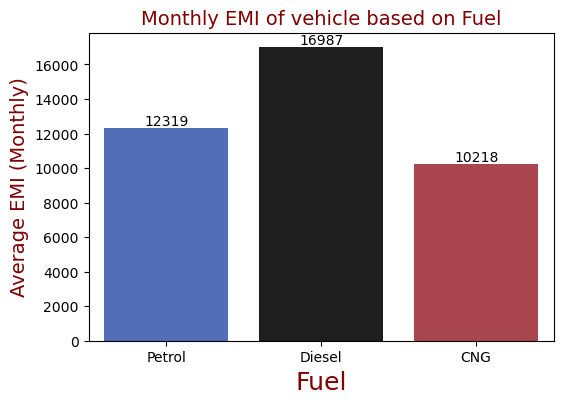

In [102]:
f, axes = plt.subplots(figsize=(6,4))
a = sns.barplot(x='Fuel',y='EMI',data=Data,palette='icefire',ci=None)
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for i in a.containers:
    a.bar_label(i, fmt='%d', label_type='edge',fontsize=10)
a.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
a.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.show()

# Multivariate Analysis:
   

C:\Users\kotha\AppData\Local\Temp\ipykernel_37588\2148984192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


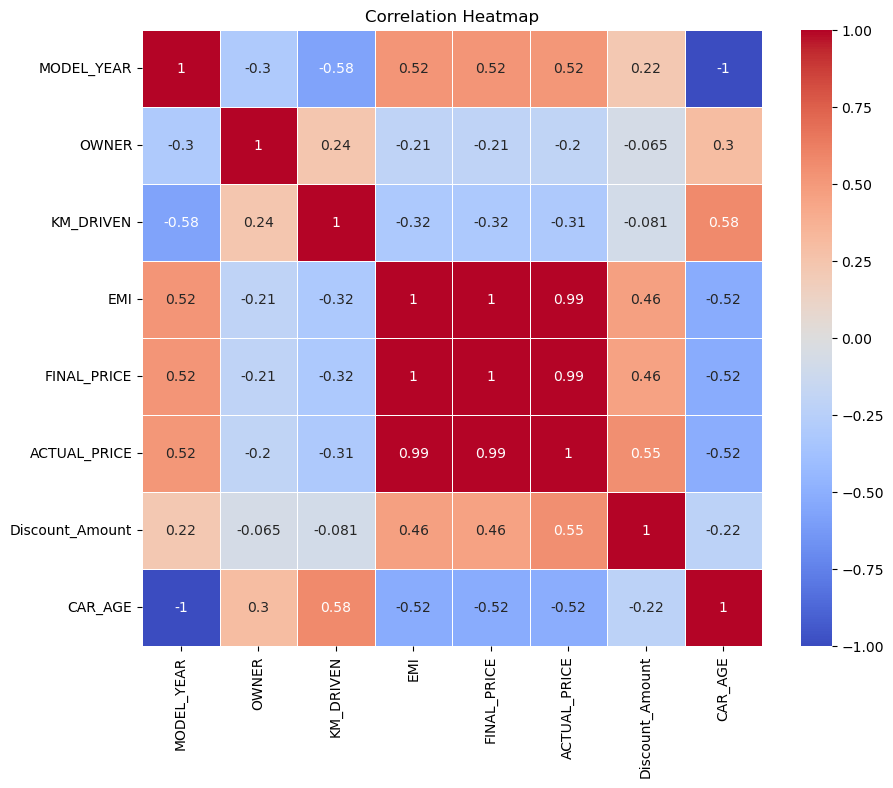

In [103]:
# Correlation Heatmap:
corr_matrix = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [104]:
pd.pivot_table(Data, index=["Transmission"],
                    columns=["OWNER"],
                    values=["FINAL_PRICE"],fill_value=0,
              aggfunc="sum")

FINAL_PRICE                    
OWNER                  1         2         3
Transmission                                
Automatic      130156033  34175698   6194000
Manual         287000778  94067797  14655000

In [105]:
pd.pivot_table(Data, index=["Location", "OWNER"], columns=["Fuel"], 
                             values="FINAL_PRICE", aggfunc="sum", fill_value=0)


Fuel                 CNG    Diesel    Petrol
Location  OWNER                             
Ahmedabad 1      6534000  21643897  61674891
          2      1383300   5068000  14244799
          3            0    311000   3374000
Benga     1            0    606000   9216300
          2            0    751000    967000
          3            0         0    318000
Bengaluru 1            0  23471299  54840794
          2            0  17728198  26709599
          3            0   1824000   3957000
Chennai   1      1080000  24180797  71761094
          2            0   6329000  23084900
          3            0   1762000   5717000
Hyderabad 1            0  30133947  68731492
          2            0   7611000  17570699
          3            0   1224000   1335000
Indore    1            0   1544800   5017000
          2            0    440000         0
Mori      1      2134000   5387000  29199500
          2       412000   1444000   4500000
          3            0    587000    440000

In [106]:
hyd_city = Data.loc[(Data['Location'] == 'Hyderabad')]
ah_city = Data.loc[(Data['Location'] == 'Ahmedabad')]
ben_city = Data.loc[(Data['Location'] == 'Bengaluru')]
ch_city = Data.loc[(Data['Location'] == 'Chennai')]
ind_city = Data.loc[(Data['Location'] == 'Indore')]

In [107]:
fuel_location = Data.groupby(by=['Location','Fuel'])['Transmission'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location

,Location,Fuel,Transmission
0,Ahmedabad,CNG,15
1,Ahmedabad,Diesel,28
2,Ahmedabad,Petrol,121
3,Benga,Diesel,2
4,Benga,Petrol,15
5,Bengaluru,Diesel,50
6,Bengaluru,Petrol,122
7,Chennai,CNG,2
8,Chennai,Diesel,35
9,Chennai,Petrol,153


In [108]:
fuel_location = Data.groupby(by=['Location','Fuel'])['Transmission'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location

,Location,Fuel,Transmission
0,Ahmedabad,CNG,15
1,Ahmedabad,Diesel,28
2,Ahmedabad,Petrol,121
3,Benga,Diesel,2
4,Benga,Petrol,15
5,Bengaluru,Diesel,50
6,Bengaluru,Petrol,122
7,Chennai,CNG,2
8,Chennai,Diesel,35
9,Chennai,Petrol,153


In [109]:
# hyd_gear = hyd_city.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
# hyd_gear
ah_gear = ah_city.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
ah_gear
# ben_gear = ben_city.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
# ben_gear
# ch_gear = ch_city.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
# ch_gear
# ind_gear = ind_city.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
# ind_gear

,OWNER,Transmission,Location
0,1,Automatic,32
1,1,Manual,87
2,2,Automatic,12
3,2,Manual,25
4,3,Automatic,3
5,3,Manual,5


In [110]:
location_gear = Data.groupby(by=['OWNER','Transmission'])['Location'].count().reset_index()
location_gear

,OWNER,Transmission,Location
0,1,Automatic,130
1,1,Manual,434
2,2,Automatic,45
3,2,Manual,177
4,3,Automatic,7
5,3,Manual,33


In [111]:
location_owner = Data.groupby(by=['Location','OWNER'])['Transmission'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,OWNER,Transmission
0,Ahmedabad,1,119
1,Ahmedabad,2,37
2,Ahmedabad,3,8
3,Benga,1,13
4,Benga,2,3
5,Benga,3,1
6,Bengaluru,1,96
7,Bengaluru,2,66
8,Bengaluru,3,10
9,Chennai,1,125
